In [2]:
#%pip install matplotlib
#%pip install pandas
#%pip install numpy
#%pip install scikit-learn
#%pip install seaborn

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
url1 = 'https://github.com/hemalathakamesh/pastebin/blob/master/nonprofit.xlsx?raw=true'
url2 = 'https://github.com/hemalathakamesh/pastebin/blob/master/nonprofit_score.xlsx?raw=true'

In [5]:
# Load the data
nonprofit_df = pd.read_excel(url1)
nonprofit_score_df = pd.read_excel(url2)

Business Opportunity:

We are group 3 and we were approached by a nonprofit organization in order to develop predictive models to improve the cost-effectiveness of their direct marketing campaigns to donors at a lower cost. The response rate currently is 10% with each contributor roughly donating about dollar 14.50 on average. With the current technique and response rate the organization is at a net loss of $0.55 with each time they send out the mail. Therefore, the organization has reached out to us so we can develop a classification model using data from the most recent campaign that can effectively capture likely donors and their expected donation amount.


Business Question:

1) How can we identify who is most likely to reply to the mailing campaign and donate?

2) What is the expected donation amount from the predicted donors?

1. ID: Identifier (not to be used in the model)
2. region: Geographic region
3. ownd: Homeownership status
4. kids: Number of children
5. inc: Household income category
6. sex: Gender
7. wlth: Wealth rating
8. hv: Average home value in the neighborhood
9. incmed: Median family income in the neighborhood
10. incavg: Average family income in the neighborhood
11. low: Percent categorized as low income in the neighborhood
12. npro: Lifetime number of promotions received
13. gifdol: Dollar amount of lifetime gifts
14. gifl: Dollar amount of the largest gift
15. gifr: Dollar amount of the most recent gift
16. mdon: Number of months since the last donation
17. lag: Number of months between the first and second gift
18. gifa: Average dollar amount of gifts
19. donr: Classification response variable (donor or non-donor)
20. damt: Prediction response variable (donation amount) **bold text**

In [6]:
nonprofit_df.head()

,ID,region,ownd,kids,inc,sex,wlth,hv,incmed,incavg,low,npro,gifdol,gifl,gifr,mdon,lag,gifa,donr,damt
0,1,ter3,1,1,4,1,8,302,76,82,0,20,81,81,19,17,6,21.05,0,0
1,2,ter3,1,2,4,0,8,262,130,130,1,95,156,16,17,19,3,13.26,1,15
2,5,ter3,1,0,4,1,4,295,39,71,14,85,132,15,10,10,6,12.07,1,17
3,6,ter2,1,1,5,0,9,114,17,25,44,83,131,5,3,13,4,4.12,1,12
4,7,ter5,1,3,4,0,8,145,39,42,10,50,74,6,5,22,3,6.50,0,0


In [7]:
# Checks for any duplicated rows
print("duplicated row count")
print(nonprofit_df.duplicated(keep=False).sum()) # duplicated row count

print("Duplicated row values")
nonprofit_df[nonprofit_df.duplicated(keep=False)] # duplicated row values

duplicated row count
0
Duplicated row values


,ID,region,ownd,kids,inc,sex,wlth,hv,incmed,incavg,low,npro,gifdol,gifl,gifr,mdon,lag,gifa,donr,damt


In [8]:
# Prints number of missing values for each column
pd.DataFrame(nonprofit_df.isnull().sum(), columns=["Null Values"]).rename_axis("Column Name") # check if there are any null

,Null Values
Column Name,
ID,0
region,0
ownd,0
kids,0
inc,0
sex,0
wlth,0
hv,0
incmed,0


In [9]:
summary_stats = nonprofit_df.describe()
summary_stats

,ID,ownd,kids,inc,sex,wlth,hv,incmed,incavg,low,npro,gifdol,gifl,gifr,mdon,lag,gifa,donr,damt
count,6002.000000,6002.000000,6002.000000,6002.000000,6002.000000,6002.000000,6002.000000,6002.000000,6002.000000,6002.000000,6002.000000,6002.000000,6002.000000,6002.000000,6002.000000,6002.000000,6002.000000,6002.000000,6002.000000
mean,3978.908197,0.884538,1.583972,3.939020,0.607797,7.023159,183.905365,43.948850,56.789404,13.885038,61.354382,115.799567,22.981340,15.653949,18.789237,6.318560,11.677666,0.498834,7.209097
std,2301.807612,0.319605,1.412455,1.401887,0.488282,2.330964,72.770510,24.664411,24.833503,13.104649,30.305150,86.537977,29.396428,12.424625,5.596294,3.641375,6.528124,0.500040,7.361232
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,51.000000,3.000000,14.000000,0.000000,2.000000,23.000000,3.000000,1.000000,5.000000,1.000000,1.890000,0.000000,0.000000
25%,1985.250000,1.000000,0.000000,3.000000,0.000000,6.000000,134.000000,27.000000,40.000000,4.000000,37.000000,65.000000,10.000000,7.000000,15.000000,4.000000,6.950000,0.000000,0.000000
50%,3945.500000,1.000000,2.000000,4.000000,1.000000,8.000000,170.000000,38.000000,52.000000,10.000000,59.000000,91.000000,16.000000,12.000000,18.000000,5.000000,10.200000,0.000000,0.000000
75%,5963.750000,1.000000,3.000000,5.000000,1.000000,9.000000,218.000000,55.000000,68.000000,20.000000,83.000000,141.000000,25.000000,20.000000,22.000000,7.000000,14.820000,1.000000,14.000000
max,8009.000000,1.000000,5.000000,7.000000,1.000000,9.000000,710.000000,287.000000,287.000000,87.000000,164.000000,1974.000000,642.000000,173.000000,40.000000,34.000000,72.270000,1.000000,27.000000


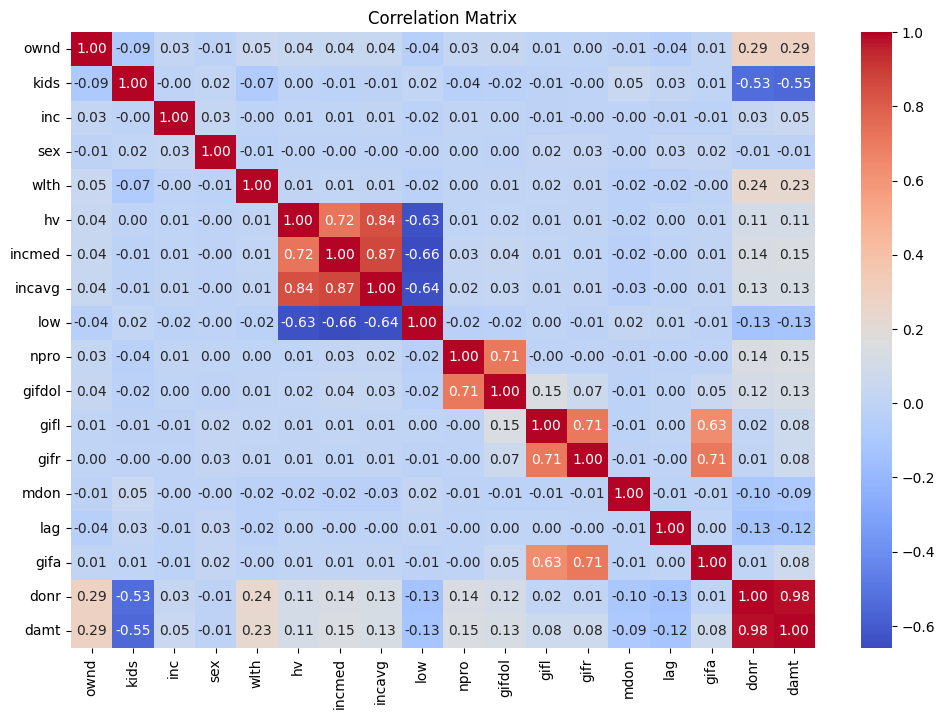

In [10]:
# Select only numeric columns manually
numeric_columns = nonprofit_df[['ownd', 'kids', 'inc', 'sex', 'wlth', 'hv', 'incmed', 'incavg', 'low', 'npro', 'gifdol', 'gifl', 'gifr', 'mdon', 'lag', 'gifa', 'donr', 'damt']]
# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

This correlation matric shows that when there is a higher income level it is strongly associated with higher home values as well. We can also tell from this graph that household with more children are less likely to be donors and that people who rent homes are less likely to donate than home owners. Also, past donation amounts correlate very highly with future donation amounts and are great predictors as a donor who has donated a lot in the past is more likely to donate a similar amount in the future.

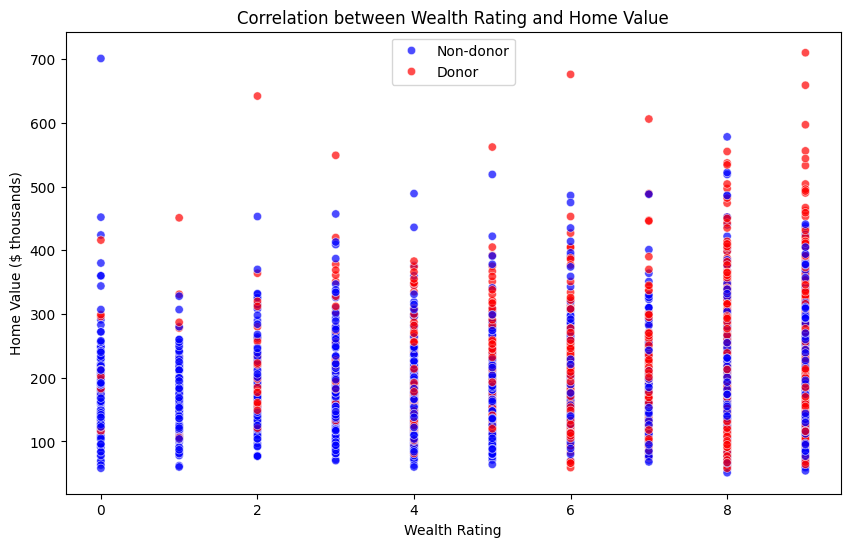

In [11]:
nonprofit_df['donr'] = nonprofit_df['donr'].astype('category')

# Define the color palette
palette = {0: 'blue', 1: 'red'}

# Scatter plot showing the correlation between wealth rating and home value
plt.figure(figsize=(10, 6))
sns.scatterplot(x='wlth', y='hv', data=nonprofit_df, hue='donr', palette=palette, alpha=0.7)
plt.title('Correlation between Wealth Rating and Home Value')
plt.xlabel('Wealth Rating')
plt.ylabel('Home Value ($ thousands)')
# Modify legend labels
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ['Non-donor', 'Donor']
plt.legend(handles, new_labels)
plt.show()

This scatterplot showcases that when home values increase there is also a higher wealth rating for both non-donor and donor groups. Also, the donors appear to have a higher average home value compared to non-donors at similar wealth ratings which also indicates that there is a positive correlation between home value and the likelihood of being a donor.

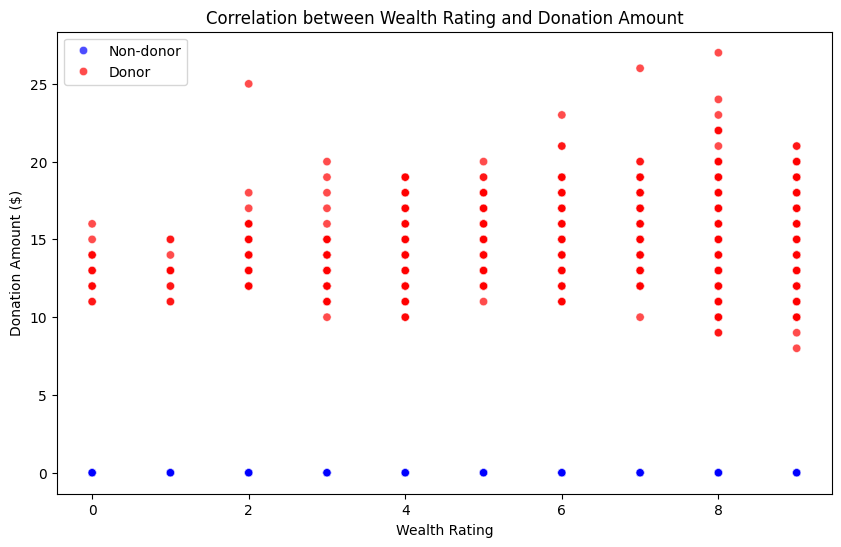

In [12]:
nonprofit_df['donr'] = nonprofit_df['donr'].astype('category')

# Define the color palette
palette = {0: 'blue', 1: 'red'}

# Scatter plot showing the correlation between wealth rating and donation amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='wlth', y='damt', data=nonprofit_df, hue='donr', palette=palette, alpha=0.7)
plt.title('Correlation between Wealth Rating and Donation Amount')
plt.xlabel('Wealth Rating')
plt.ylabel('Donation Amount ($)')
new_labels = ['Non-donor', 'Donor']
plt.legend(handles, new_labels)
plt.show()

In this scatterplot, we can see that when wealth ratings increase the donation amounts also have an increase when we're looking at donors which suggests a positive correlation between wealth rating and donation amount. Additionally, non-donors show a zero-donation amount rate amoung all wealth ratings, which makes sense because non-donors do not donate. This trend suggests that wealthier individuals tend to donate more.

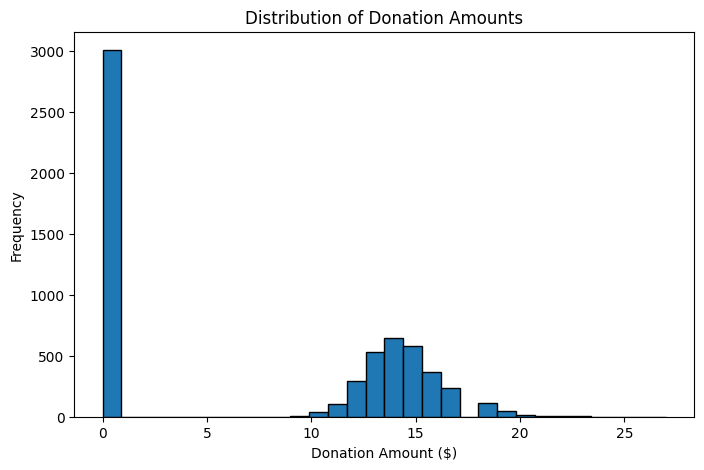

In [13]:
# Distribution of Donation Amounts
plt.figure(figsize=(8, 5))
nonprofit_df['damt'].plot(kind='hist', bins=30, edgecolor='black')
plt.title('Distribution of Donation Amounts')
plt.xlabel('Donation Amount ($)')
plt.ylabel('Frequency')
plt.show()

This Histogram depicts the frequency in which an amount is donated. Because half of the people in this survey did not donate there is a high value of donations of 0. But if we only taken in those who did donate, we can see the majority of people donated 14 dollars and donations range from 8-27 dollars. Most people who did donate, donated about the same amount (with a slight right skew).

<ipython-input-14-ba7412b51549>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Income Category', y='Average Donation Amount', data=average_donations_by_income, palette='viridis')


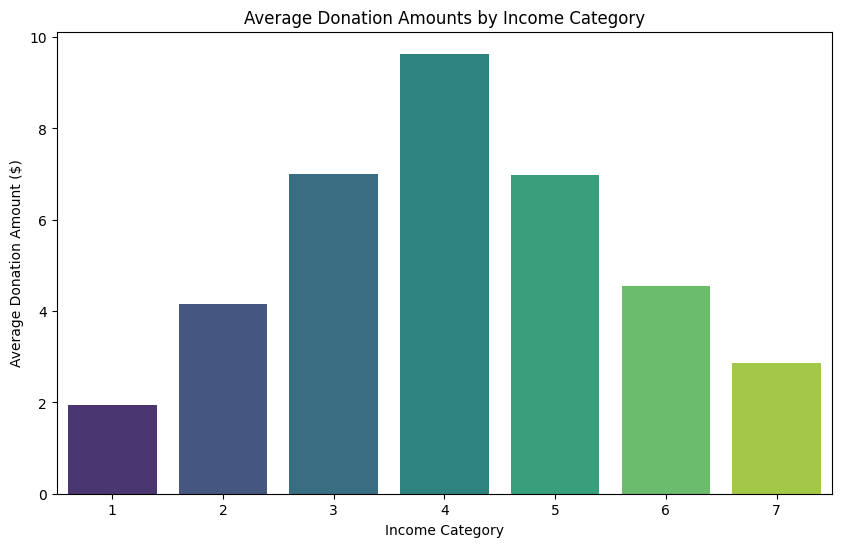

In [14]:
# Grouping the data by income category and calculating the average donation amount
average_donations_by_income = nonprofit_df.groupby('inc')['damt'].mean().reset_index()

# Renaming the columns for clarity
average_donations_by_income.columns = ['Income Category', 'Average Donation Amount']

# Plotting the average donation amounts by income category
plt.figure(figsize=(10, 6))
sns.barplot(x='Income Category', y='Average Donation Amount', data=average_donations_by_income, palette='viridis')
plt.title('Average Donation Amounts by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Average Donation Amount ($)')
plt.show()

The histogram shows that the income category 4 average donation is slightly below 10 but taking in to consideration about half of the participates are in this category, it is likely that this might had an effect on the data and showing the highest average donation comes from category 4.

<ipython-input-15-00e8de026578>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Average Donation Amount', data=average_donations_by_region, palette='viridis')


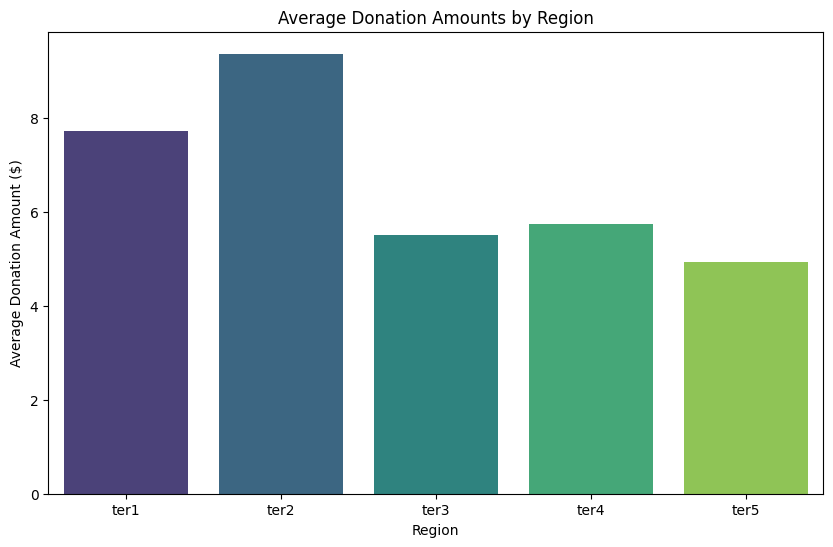

In [15]:
# Grouping the data by region and calculating the average donation amount
average_donations_by_region = nonprofit_df.groupby('region')['damt'].mean().reset_index()

# Renaming the columns for clarity
average_donations_by_region.columns = ['Region', 'Average Donation Amount']

# Plotting the average donation amounts by region
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Average Donation Amount', data=average_donations_by_region, palette='viridis')
plt.title('Average Donation Amounts by Region')
plt.xlabel('Region')
plt.ylabel('Average Donation Amount ($)')
plt.show()

In this graph it shows the average amount of money is donated by each region. Ter2 has the highest donation amount with Ter1 coming in second.

<ipython-input-16-184f2f3ca2a6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ownd', y='damt', data=nonprofit_df, palette='pastel')


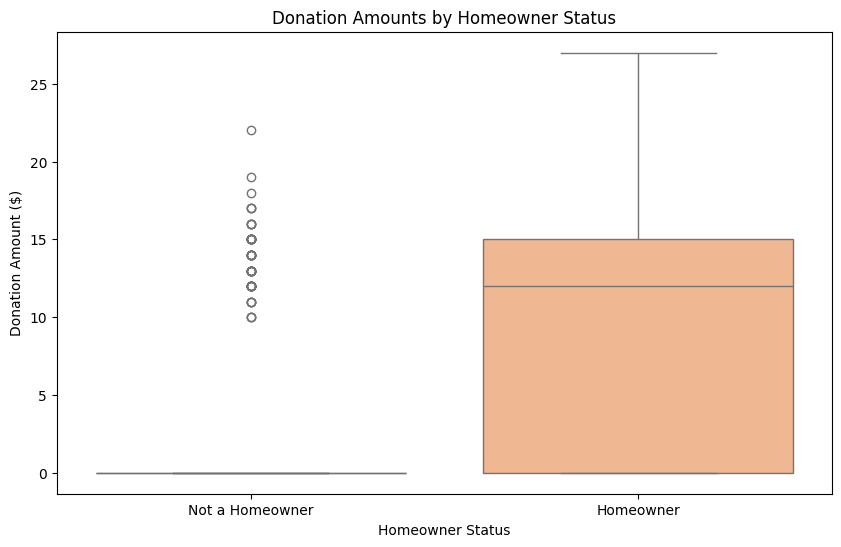

In [16]:
# Box plot showing the distribution of donation amounts by homeowner status
plt.figure(figsize=(10, 6))
sns.boxplot(x='ownd', y='damt', data=nonprofit_df, palette='pastel')
plt.title('Donation Amounts by Homeowner Status')
plt.xlabel('Homeowner Status')
plt.ylabel('Donation Amount ($)')
plt.xticks(ticks=[0, 1], labels=['Not a Homeowner', 'Homeowner'])
plt.show()

Homeowners donate about dollar 14 as a median and some of the donations even reach up to dollar 27. However, non-homeowners have a much narrower range of donations with most of them being around $10 - $15 and very few are much more than that. This suggests that home-owners are willing to donate higher amounts more frequently than non-homeowners.

<ipython-input-17-405d4f9e4569>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='wlth', y='gifl', data=nonprofit_df, palette='pastel')


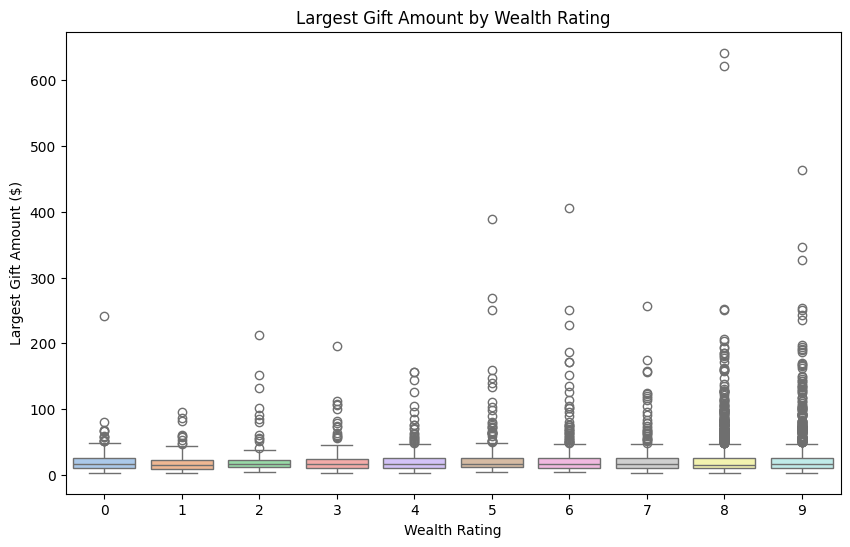

In [17]:
# Box plot showing the distribution of largest gift amount by wealth rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='wlth', y='gifl', data=nonprofit_df, palette='pastel')
plt.title('Largest Gift Amount by Wealth Rating')
plt.xlabel('Wealth Rating')
plt.ylabel('Largest Gift Amount ($)')
plt.show()

As we see wealth ratings increase there is also a higher maximum gift amount as we see more and larger outliers. The median, however, seems to remain fairly constant amoung all wealth ratings, but wealthier individuals have the potential to donate larger gifts even though all the medians are approximately the same.

In [18]:
# Dropping the 'id' column
nonprofit_df.drop(columns=['ID'], inplace=True)

In [19]:
# Aggregating features
nonprofit_df['income_metric'] = (nonprofit_df['incmed'] + nonprofit_df['incavg']) / 2
nonprofit_df.head()

,region,ownd,kids,inc,sex,wlth,hv,incmed,incavg,low,npro,gifdol,gifl,gifr,mdon,lag,gifa,donr,damt,income_metric
0,ter3,1,1,4,1,8,302,76,82,0,20,81,81,19,17,6,21.05,0,0,79.0
1,ter3,1,2,4,0,8,262,130,130,1,95,156,16,17,19,3,13.26,1,15,130.0
2,ter3,1,0,4,1,4,295,39,71,14,85,132,15,10,10,6,12.07,1,17,55.0
3,ter2,1,1,5,0,9,114,17,25,44,83,131,5,3,13,4,4.12,1,12,21.0
4,ter5,1,3,4,0,8,145,39,42,10,50,74,6,5,22,3,6.50,0,0,40.5


In [20]:
# encode categorical columns as binary values (0/1)
nonprofit_df = pd.get_dummies(nonprofit_df,columns=['region'] ,prefix_sep='_', dtype=int)
nonprofit_df.head()

,ownd,kids,inc,sex,wlth,hv,incmed,incavg,low,npro,...,lag,gifa,donr,damt,income_metric,region_ter1,region_ter2,region_ter3,region_ter4,region_ter5
0,1,1,4,1,8,302,76,82,0,20,...,6,21.05,0,0,79.0,0,0,1,0,0
1,1,2,4,0,8,262,130,130,1,95,...,3,13.26,1,15,130.0,0,0,1,0,0
2,1,0,4,1,4,295,39,71,14,85,...,6,12.07,1,17,55.0,0,0,1,0,0
3,1,1,5,0,9,114,17,25,44,83,...,4,4.12,1,12,21.0,0,1,0,0,0
4,1,3,4,0,8,145,39,42,10,50,...,3,6.50,0,0,40.5,0,0,0,0,1


Data Preparation:

The data set has 20 columns and there are no duplicate rows or columns nor are there any missing values in any of the columns. I removed the ID column because it was not necessary for the analysis and instead added a new column called 'income_metric' by averaging the 'incmed' and 'incavg' columns. i also converted the categorical 'region' column into binary values. I also have not removed any outliers from the dataset because it has been oversampled to have equal proportions of donors and non-donors so any outlier removal is unnecessary.

Modeling: Performed by Sonali Sabnam
1.	Develop classification models for the DONR variable using any of the reasonable variables as predictors (except ID and DAMT). Fit and tune, if needed, at least three candidate models of different algorithms .
2.	Develop prediction models for the DAMT variable using any of the reasonable variables as predictors (except ID and DONR). Fit and tune, if needed, at least three candidate models of different algorithms.


In [21]:
####### Code by: Sonali Sabnam
####### Preprocessing required for modelling
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


train_df = nonprofit_df
test_df = nonprofit_score_df

######## Adding the income_metric column to testing dataset
# Aggregating features
test_df['income_metric'] = (test_df['incmed'] + test_df['incavg']) / 2
test_df.head()

# encode categorical columns as binary values (0/1) for testing dataset
test_df = pd.get_dummies(test_df,columns=['region'] ,prefix_sep='_', dtype=int)
test_df.head()

# Preprocessing pipelines for numerical and categorical data
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])



### Description by Sonali Sabnam

**Modeling** is the fourth step in the CRISP-DM (Cross Industry Standard Process for Data Mining) framework. Based on the problem statement we identified the Dependent variables “donr” and “damt” from the given data.

**“donr”**: As we must capture the likely doners we select the variable “donr” from the given dataset to be our dependent variable for Classification Models.

**“damt”**: As we must predict the expected gift amount from doners we select “damt” to be the dependent variable from the given dataset for the Regression models.

We explored various models to identify and selected the best suited models for our problem statement. The details are described below.
**Problem Statement:** To capture likely doners and predict the expected gift amount from doners

•	**Classification:** To classify the record as “doner” or “non-doner”

Dependent Variable (Y): “donr”
Independent Variables (X): "region", "ownd", "kids", "inc", "sex", "wlth", "hv", "low", "npro", "gifdol", "gifl", "gifr", "mdon", "lag", "gifa"
Columns not considered as Independent Variables from the dataset:’id’, 'incmed', 'incavg', 'donr', 'damt'
**Models Considered for Classification: **
KNN, Neural network, Logistic Regression, Random Forest, Support Vector Machine
Models Used for Classification:
Logistic Regression, Random Forest, Support Vector Machine

•	**Prediction:** To predict the amount of donation
Dependent Variable (Y): “damt”
Independent Variable (X): "region", "ownd", "kids", "inc", "sex", "wlth", "hv", "low", "npro", "gifdol", "gifl", "gifr", "mdon", "lag", "gifa"
Columns not considered as Independent Variables from the dataset:’id’, 'incmed', 'incavg', 'donr', 'damt'

**Models Considered for Prediction:** KNN, Neural network, Linear Regression, Random Forest Regressor, Gradient Boosting Regressor
Models Used for Prediction: Linear Regression, Random Forest Regressor, Gradient Boosting Regressor
Reason for not using KNN: As we are dealing with oversampled data, there is a fair chance of overfitting
Reason for not using Neural Network: It is a strong modelling algorithm, but it requires a large dataset for high accuracy.


**Modelling Process followed:**
As we have two different datasets, we have used the below approach for both Classification and Regression.
o	Training: Use the entire training dataset.
o	Preprocess test data: Apply the same preprocessing steps as the training data using the fitted preprocessor.
o	Use test data for making predictions: Predict the target variable using the trained model on the test data.


**Evaluation the Modelling Results:**
Classification: Though all the three models perform fair, we can see that the Random Forest algorithm has the accuracy same as Support Vector Machine (highest accuracy) but the lowest misclassification rate. This makes it the best suited model.

Regression: The below results are recorded from the Regression models. We can see that Gradient Boosting Regressor has the lowest Mean Square Error (MSE) and highest R-Squared values which makes it the best model among the three models. The result screenshot is shown below.
Model	MSE	R^2
Linear Regression	1.70207119	0.555396394
Random Forest Regressor 	1.525500501	0.601519004
Gradient Boosting Regressor	1.295824701	0.661513374



Confusion Matrix for Logistic Regression:
 [[497 108]
 [ 80 516]]

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84       605
           1       0.83      0.87      0.85       596

    accuracy                           0.84      1201
   macro avg       0.84      0.84      0.84      1201
weighted avg       0.84      0.84      0.84      1201

Misclassification Rate for Logistic Regression: 0.1565362198168193


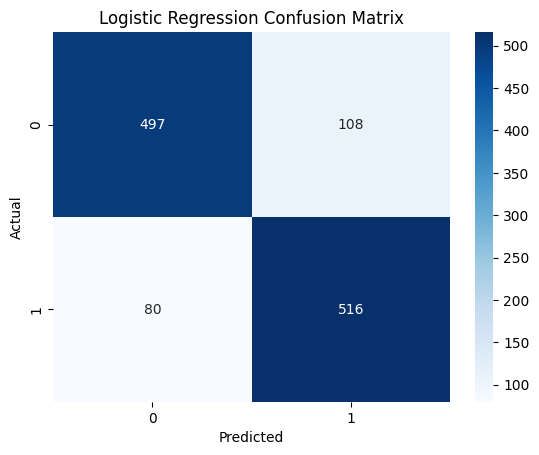

Confusion Matrix for Random Forest:
 [[527  78]
 [ 49 547]]

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       605
           1       0.88      0.92      0.90       596

    accuracy                           0.89      1201
   macro avg       0.90      0.89      0.89      1201
weighted avg       0.90      0.89      0.89      1201

Misclassification Rate for Random Forest: 0.10574521232306411


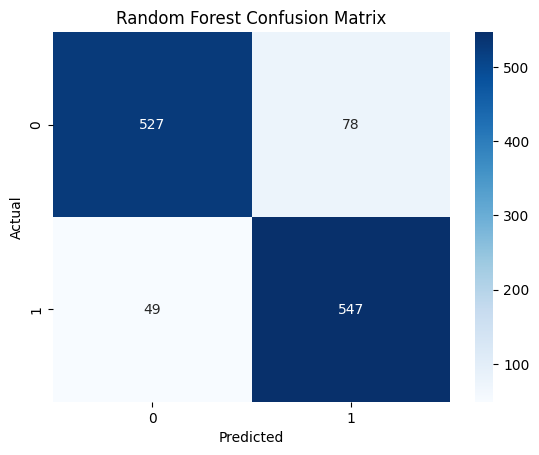

Confusion Matrix for Support Vector Machine:
 [[521  84]
 [ 50 546]]

Classification Report for Support Vector Machine:
               precision    recall  f1-score   support

           0       0.91      0.86      0.89       605
           1       0.87      0.92      0.89       596

    accuracy                           0.89      1201
   macro avg       0.89      0.89      0.89      1201
weighted avg       0.89      0.89      0.89      1201

Misclassification Rate for Support Vector Machine: 0.11157368859283934


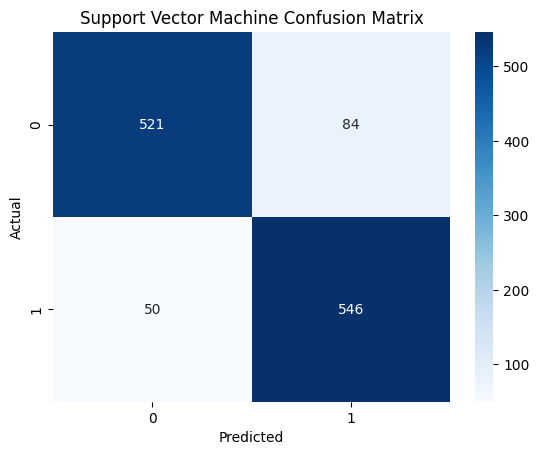

Confusion Matrix for KNN Classifier:
 [[443 162]
 [ 41 555]]

Classification Report for KNN Classifier:
               precision    recall  f1-score   support

           0       0.92      0.73      0.81       605
           1       0.77      0.93      0.85       596

    accuracy                           0.83      1201
   macro avg       0.84      0.83      0.83      1201
weighted avg       0.85      0.83      0.83      1201

Misclassification Rate for KNN Classifier: 0.16902581182348042


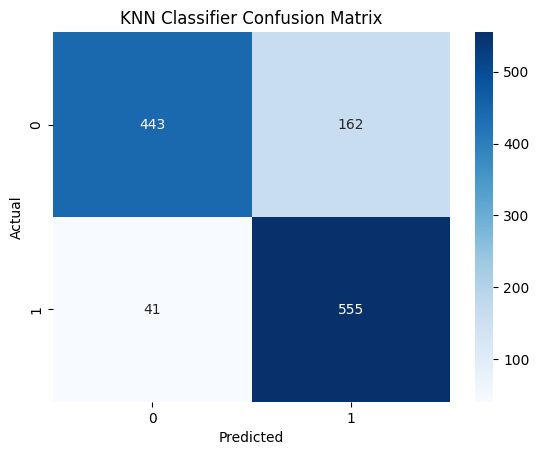

Confusion Matrix for Neural Network Classifier:
 [[537  68]
 [ 50 546]]

Classification Report for Neural Network Classifier:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       605
           1       0.89      0.92      0.90       596

    accuracy                           0.90      1201
   macro avg       0.90      0.90      0.90      1201
weighted avg       0.90      0.90      0.90      1201

Misclassification Rate for Neural Network Classifier: 0.09825145711906746


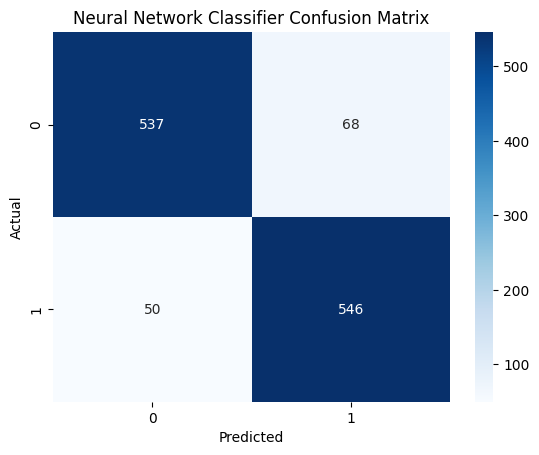

Predictions on Test Data using Logistic Regression:
 [1 1 0 ... 0 1 0]
Predictions on Test Data using Random Forest:
 [0 0 0 ... 0 1 0]
Predictions on Test Data using Support Vector Machine:
 [1 1 1 ... 0 1 0]
Predictions on Test Data using KNN Classifier:
 [1 1 1 ... 0 1 0]
Predictions on Test Data using Neural Network Classifier:
 [0 1 1 ... 0 1 0]


In [22]:
####### Code by: Sonali Sabnam
####### Classification models Executed : Logistic Regression,Random Forest,Support Vector Machine, KNN Classifier, Neural Network Classifier
####### Classification models selected : Logistic Regression,Random Forest,Support Vector Machine
#######

# Define features and target variables for classification
X_train = train_df.drop(columns=['incmed', 'incavg','donr', 'damt'])
y_train = train_df['donr']

# Identify categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_cols = X_train.select_dtypes(include=['number']).columns

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ])

# Split the training data into a new training subset and a validation subset
X_train_part, X_val, y_train_part, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Logistic Regression
log_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear', C=1))
])

log_reg_pipeline.fit(X_train_part, y_train_part)
y_val_pred_log_reg = log_reg_pipeline.predict(X_val)

conf_matrix_log_reg = confusion_matrix(y_val, y_val_pred_log_reg)
class_report_log_reg = classification_report(y_val, y_val_pred_log_reg)

print("Confusion Matrix for Logistic Regression:\n", conf_matrix_log_reg)
print("\nClassification Report for Logistic Regression:\n", class_report_log_reg)

# Calculate Accuracy
accuracy_log_reg = accuracy_score(y_val, y_val_pred_log_reg)
print("Misclassification Rate for Logistic Regression:", (1- accuracy_log_reg))

sns.heatmap(conf_matrix_log_reg, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



# Random Forest
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42))
])

rf_pipeline.fit(X_train_part, y_train_part)
y_val_pred_rf = rf_pipeline.predict(X_val)

conf_matrix_rf = confusion_matrix(y_val, y_val_pred_rf)
class_report_rf = classification_report(y_val, y_val_pred_rf)

print("Confusion Matrix for Random Forest:\n", conf_matrix_rf)
print("\nClassification Report for Random Forest:\n", class_report_rf)

# Calculate Accuracy
accuracy_rf = accuracy_score(y_val, y_val_pred_rf)
print("Misclassification Rate for Random Forest:", (1- accuracy_rf))

sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Support Vector Machine
svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(C=1, gamma='auto'))
])

svm_pipeline.fit(X_train_part, y_train_part)
y_val_pred_svm = svm_pipeline.predict(X_val)

conf_matrix_svm = confusion_matrix(y_val, y_val_pred_svm)
class_report_svm = classification_report(y_val, y_val_pred_svm)

print("Confusion Matrix for Support Vector Machine:\n", conf_matrix_svm)
print("\nClassification Report for Support Vector Machine:\n", class_report_svm)

# Calculate Accuracy
accuracy_svm = accuracy_score(y_val, y_val_pred_svm)
print("Misclassification Rate for Support Vector Machine:", (1- accuracy_svm))

sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues")
plt.title("Support Vector Machine Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# KNN Classifier
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

knn_pipeline.fit(X_train_part, y_train_part)
y_val_pred_knn = knn_pipeline.predict(X_val)

conf_matrix_knn = confusion_matrix(y_val, y_val_pred_knn)
class_report_knn = classification_report(y_val, y_val_pred_knn)

print("Confusion Matrix for KNN Classifier:\n", conf_matrix_knn)
print("\nClassification Report for KNN Classifier:\n", class_report_knn)

# Calculate Accuracy
accuracy_knn = accuracy_score(y_val, y_val_pred_knn)
print("Misclassification Rate for KNN Classifier:", (1- accuracy_knn))

sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues")
plt.title("KNN Classifier Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Neural Network Classifier
nn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42))  # Adjust hidden layers and iterations as needed
])

nn_pipeline.fit(X_train_part, y_train_part)
y_val_pred_nn = nn_pipeline.predict(X_val)

conf_matrix_nn = confusion_matrix(y_val, y_val_pred_nn)
class_report_nn = classification_report(y_val, y_val_pred_nn)

print("Confusion Matrix for Neural Network Classifier:\n", conf_matrix_nn)
print("\nClassification Report for Neural Network Classifier:\n", class_report_nn)

# Calculate Accuracy
accuracy_nn = accuracy_score(y_val, y_val_pred_nn)
print("Misclassification Rate for Neural Network Classifier:", (1- accuracy_nn))

sns.heatmap(conf_matrix_nn, annot=True, fmt="d", cmap="Blues")
plt.title("Neural Network Classifier Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



# Train the models on the full training data and make predictions on the test data

# Logistic Regression
log_reg_pipeline.fit(X_train, y_train)
X_test = test_df.drop(columns=['ID'])
X_test_preprocessed = log_reg_pipeline.named_steps['preprocessor'].transform(X_test)
y_test_pred_log_reg = log_reg_pipeline.named_steps['classifier'].predict(X_test_preprocessed)
print("Predictions on Test Data using Logistic Regression:\n", y_test_pred_log_reg)

#initialise test_df_pred to null
test_df_pred=None
# copy the test_df to test_df_pred
test_df_pred=test_df.copy()
#Add the Logistic Regression prediction data into the test dataset
test_df_pred['Pred_Donr_log_reg'] = y_test_pred_log_reg


# Random Forest
rf_pipeline.fit(X_train, y_train)
X_test_preprocessed = rf_pipeline.named_steps['preprocessor'].transform(X_test)
y_test_pred_rf = rf_pipeline.named_steps['classifier'].predict(X_test_preprocessed)
print("Predictions on Test Data using Random Forest:\n", y_test_pred_rf)

# Add the Random Forest prediction data into the test dataset
test_df_pred['Pred_Donr_rf'] = y_test_pred_rf

# Support Vector Machine
svm_pipeline.fit(X_train, y_train)
X_test_preprocessed = svm_pipeline.named_steps['preprocessor'].transform(X_test)
y_test_pred_svm = svm_pipeline.named_steps['classifier'].predict(X_test_preprocessed)
print("Predictions on Test Data using Support Vector Machine:\n", y_test_pred_svm)

# Add the Support Vector Machine prediction data into the test dataset
test_df_pred['Pred_Donr_svm'] = y_test_pred_svm

# KNN Classifier
knn_pipeline.fit(X_train, y_train)
X_test_preprocessed = knn_pipeline.named_steps['preprocessor'].transform(X_test)
y_test_pred_knn = knn_pipeline.named_steps['classifier'].predict(X_test_preprocessed)
print("Predictions on Test Data using KNN Classifier:\n", y_test_pred_knn)

#Commenting as we are not using this model
# Add the KNN prediction data into the test dataset
# test_df_pred['Pred_Donr_knn'] = y_test_pred_knn

# Neural Network Classifier
nn_pipeline.fit(X_train, y_train)
X_test_preprocessed = nn_pipeline.named_steps['preprocessor'].transform(X_test)
y_test_pred_nn = nn_pipeline.named_steps['classifier'].predict(X_test_preprocessed)
print("Predictions on Test Data using Neural Network Classifier:\n", y_test_pred_nn)

#Commenting as we are not using this model
# Add the Neural Network prediction data into the test dataset
# test_df_pred['Pred_Donr_nn'] = y_test_pred_nn







In [23]:
####### Code by: Sonali Sabnam
####### Regression models Executed : Linear Regression,Random Forest Regressor,Gradient Boosting Regressor, KNN Regressor, Neural Network Regressor
####### Regression models selected : Linear Regression,Random Forest Regressor,Gradient Boosting Regressor
#######

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the test dataset to only include predicted donors
donor_pred_log_reg_indices = test_df_pred[test_df_pred['Pred_Donr_log_reg'] == 1].index # Hemalatha Kamesh
donor_pred_rf_indices = test_df_pred[test_df_pred['Pred_Donr_rf'] == 1].index # Hemalatha Kamesh
donor_pred_svm_indices = test_df_pred[test_df_pred['Pred_Donr_svm'] == 1].index # Hemalatha Kamesh

# Define features and target variables for classification
train_df = train_df[train_df['donr'] == 1] # Hemalatha Kamesh
X_train = train_df.drop(columns=['incmed', 'incavg','donr', 'damt'])
y_train = train_df['damt']

# Split the training data into a new training subset and a validation subset
X_train_part, X_val, y_train_part, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Linear Regression
lin_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LinearRegression())
])

lin_reg_pipeline.fit(X_train_part, y_train_part)
y_val_pred_lin_reg = lin_reg_pipeline.predict(X_val)

mse_lin_reg = mean_squared_error(y_val, y_val_pred_lin_reg)
r2_lin_reg = r2_score(y_val, y_val_pred_lin_reg)

print("Linear Regression MSE:", mse_lin_reg)
print("Linear Regression R^2:", r2_lin_reg)

# Random Forest Regressor
rf_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42))
])

rf_reg_pipeline.fit(X_train_part, y_train_part)
y_val_pred_rf_reg = rf_reg_pipeline.predict(X_val)

mse_rf_reg = mean_squared_error(y_val, y_val_pred_rf_reg)
r2_rf_reg = r2_score(y_val, y_val_pred_rf_reg)

print("Random Forest Regressor MSE:", mse_rf_reg)
print("Random Forest Regressor R^2:", r2_rf_reg)

# Gradient Boosting Regressor
gbr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
])

gbr_pipeline.fit(X_train_part, y_train_part)
y_val_pred_gbr = gbr_pipeline.predict(X_val)

mse_gbr = mean_squared_error(y_val, y_val_pred_gbr)
r2_gbr = r2_score(y_val, y_val_pred_gbr)

print("Gradient Boosting Regressor MSE:", mse_gbr)
print("Gradient Boosting Regressor R^2:", r2_gbr)

# KNN Regressor
knn_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsRegressor(n_neighbors=5))
])

knn_reg_pipeline.fit(X_train_part, y_train_part)
y_val_pred_knn_reg = knn_reg_pipeline.predict(X_val)

mse_knn_reg = mean_squared_error(y_val, y_val_pred_knn_reg)
r2_knn_reg = r2_score(y_val, y_val_pred_knn_reg)

print("KNN Regressor MSE:", mse_knn_reg)
print("KNN Regressor R^2:", r2_knn_reg)

# Neural Network Regressor
nn_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MLPRegressor(hidden_layer_sizes=(100,), max_iter=300, random_state=42))  # Adjust hidden layers and iterations as needed
])

nn_reg_pipeline.fit(X_train_part, y_train_part)
y_val_pred_nn_reg = nn_reg_pipeline.predict(X_val)

mse_nn_reg = mean_squared_error(y_val, y_val_pred_knn_reg)
r2_nn_reg = r2_score(y_val, y_val_pred_nn_reg)

print("Neural Network Regressor MSE:", mse_nn_reg)
print("Neural Network R^2:", r2_nn_reg)


# Train the models on the full training data and make predictions on the test data

# Linear Regression
lin_reg_pipeline.fit(X_train, y_train)
X_test = test_df.drop(columns=['ID'])
#X_test = test_df_pred.loc[donor_pred_log_reg_indices].drop(columns=['Pred_Donr_log_reg'])# Hemalatha Kamesh
X_test = test_df_pred.loc[donor_pred_rf_indices].drop(columns=['Pred_Donr_log_reg'])# Hemalatha Kamesh
X_test_preprocessed = lin_reg_pipeline.named_steps['preprocessor'].transform(X_test)
y_test_pred_lin_reg = lin_reg_pipeline.named_steps['classifier'].predict(X_test_preprocessed)
print("Predictions on Test Data using Linear Regression:\n", y_test_pred_lin_reg)

# Add the Linear Regression prediction data to the testing dataset
#test_df_pred['Pred_damt_lin_reg'] = y_test_pred_lin_reg

# Random Forest Regressor
rf_reg_pipeline.fit(X_train, y_train)
X_test = test_df_pred.loc[donor_pred_rf_indices].drop(columns=['Pred_Donr_rf'])# Hemalatha Kamesh
X_test_preprocessed = rf_reg_pipeline.named_steps['preprocessor'].transform(X_test)
y_test_pred_rf_reg = rf_reg_pipeline.named_steps['classifier'].predict(X_test_preprocessed)
print("Predictions on Test Data using Random Forest Regressor:\n", y_test_pred_rf_reg)

# Add the Random Forest Regressor prediction data to the testing dataset
#test_df_pred['Pred_damt_rf_reg'] = y_test_pred_rf_reg

# Gradient Boosting Regressor
gbr_pipeline.fit(X_train, y_train)
#X_test = test_df_pred.loc[donor_pred_svm_indices].drop(columns=['Pred_Donr_svm'])# Hemalatha Kamesh
X_test = test_df_pred.loc[donor_pred_rf_indices].drop(columns=['Pred_Donr_svm'])# Hemalatha Kamesh
X_test_preprocessed = gbr_pipeline.named_steps['preprocessor'].transform(X_test)
y_test_pred_gbr = gbr_pipeline.named_steps['classifier'].predict(X_test_preprocessed)
print("Predictions on Test Data using Gradient Boosting Regressor:\n", y_test_pred_gbr)

# Add the Random Forest Regressor prediction data to the testing dataset
#test_df_pred['Pred_damt_gb_reg'] = y_test_pred_gbr

# KNN Regressor
knn_pipeline.fit(X_train, y_train)
X_test_preprocessed = knn_pipeline.named_steps['preprocessor'].transform(X_test)
y_test_pred_knn_reg = knn_pipeline.named_steps['classifier'].predict(X_test_preprocessed)
print("Predictions on Test Data using KNN Regressor:\n", y_test_pred_knn_reg)

# Commenting the code as we are not using the model for evalutation
# Add the KNN Regressor  data to the testing dataset
# test_df_pred['Pred_damt_knn_reg'] = y_test_pred_knn_reg

# Neural Network Regressor
nn_pipeline.fit(X_train, y_train)
X_test_preprocessed = nn_pipeline.named_steps['preprocessor'].transform(X_test)
y_test_pred_nn_reg = nn_pipeline.named_steps['classifier'].predict(X_test_preprocessed)
print("Predictions on Test Data using Neural Network Regressor:\n", y_test_pred_nn_reg)

# Commenting the code as we are not using the model for evalutation
# Add the Neural Network Regressor data to the testing dataset
# test_df_pred['Pred_damt_nn_reg'] = y_test_pred_nn_reg



Linear Regression MSE: 1.7020711902059558
Linear Regression R^2: 0.5553963943369824
Random Forest Regressor MSE: 1.5255005008347244
Random Forest Regressor R^2: 0.6015190040142867
Gradient Boosting Regressor MSE: 1.2958247013626571
Gradient Boosting Regressor R^2: 0.661513373912799
KNN Regressor MSE: 2.2008013355592655
KNN Regressor R^2: 0.4251214551024539


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network Regressor MSE: 2.2008013355592655
Neural Network R^2: 0.5882543394734046
Predictions on Test Data using Linear Regression:
 [16.10495807 13.6069112  14.6928487  13.92136432 13.2162862  13.75339557
 12.33152057 16.88425495 13.62058307 11.67136432 13.52487995 13.70456745
 13.33737995 13.82175495 18.12448932 16.0834737  17.04050495 15.40183307
 18.9819112  15.0756612  15.5990987  19.91355182 14.00339557 16.92331745
 14.24362995 13.5912862  12.91355182 13.79831745 16.2397237  13.86081745
 12.46433307 15.0131612  14.20456745 15.28855182 16.70261432 13.9115987
 13.7162862  14.58933307 14.1694112  13.67527057 14.38230182 11.53269245
 12.78269245 13.3334737  14.1303487  14.6069112  14.68894245 13.60300495
 15.84519245 16.0287862  13.16550495 14.69675495 16.1069112  14.92331745
 12.8178487  13.70261432 13.1381612  15.54831745 12.30612995 13.51902057
 14.95652057 12.64792682 14.08152057 13.95456745 15.16355182 12.2553487
 14.69089557 16.1225362  14.7865987  12.49362995 17.48386432

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [24]:
# Hemalatha Kamesh
# Add the regression predictions to the entire test dataset
test_df_pred['Pred_Damt_log_reg'] = 0  # Initialize the donation amount predictions to 0
test_df_pred['Pred_Damt_rf'] = 0  # Initialize the donation amount predictions to 0
test_df_pred['Pred_Damt_gbr'] = 0  # Initialize the donation amount predictions to 0

# Assign predicted donation amounts only to donor indices
#test_df_pred.loc[donor_pred_log_reg_indices, 'Pred_Damt_log_reg'] = y_test_pred_lin_reg
test_df_pred.loc[donor_pred_rf_indices, 'Pred_Damt_log_reg'] = y_test_pred_lin_reg  # Replace 'donor_pred_log_reg_indices' with 'donor_pred_rf_indices' by Sonali
# Assign predicted donation amounts only to donor indices
test_df_pred.loc[donor_pred_rf_indices, 'Pred_Damt_rf'] = y_test_pred_rf_reg
# Assign predicted donation amounts only to donor indices
# test_df_pred.loc[donor_pred_svm_indices, 'Pred_Damt_gbr'] = y_test_pred_gbr
test_df_pred.loc[donor_pred_rf_indices, 'Pred_Damt_gbr'] = y_test_pred_gbr  # Replace 'donor_pred_svm_indices' with 'donor_pred_rf_indices' by Sonali

# Display the first 25 rows of the test dataset with both donor predictions and donation amounts
test_df_head_25 = test_df_pred.head(25)
print(test_df_head_25)

    ID  ownd  kids  inc  sex  wlth   hv  incmed  incavg  low  ...  \
0    3     1     1    5    1     8  303      61      90    6  ...   
1    4     1     1    4    0     8  317     121     121    0  ...   
2    9     1     2    3    1     5  194     112     112    0  ...   
3   16     0     2    3    1     8  127      24      33   15  ...   
4   20     0     2    4    0     3  137      21      40   17  ...   
5   22     1     0    3    0     9  340      85     117    1  ...   
6   23     1     1    4    1     9  197      64      72    2  ...   
7   27     1     1    3    0     8  138      26      32   32  ...   
8   28     1     3    1    1     9   80      41      41   22  ...   
9   29     0     2    7    1     8  171      44      55   10  ...   
10  31     0     3    1    1     8  130      55      63    4  ...   
11  36     1     2    4    0     8  138      44      67   10  ...   
12  37     1     2    4    1     4  183      27      47   20  ...   
13  41     1     0    2    0     6

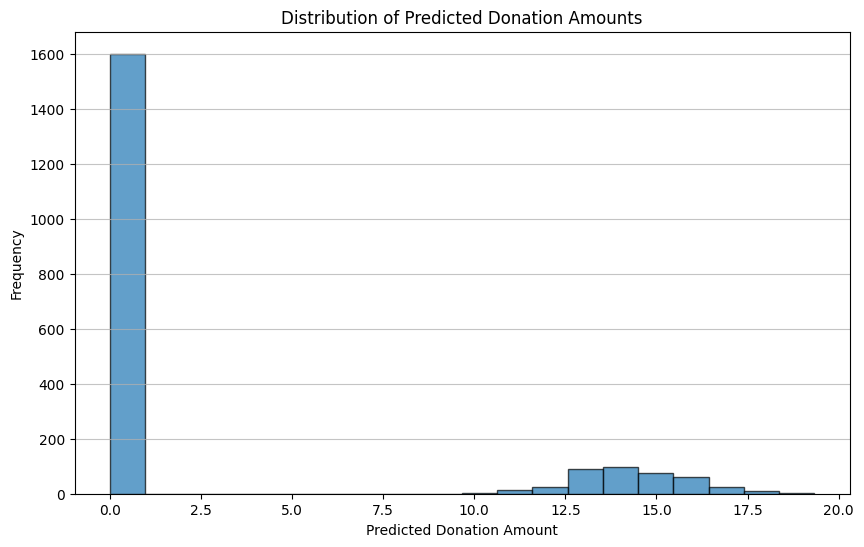

In [25]:
# Visualize the predicted donation amounts
plt.figure(figsize=(10, 6))
plt.hist(test_df_pred['Pred_Damt_rf'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Predicted Donation Amounts')
plt.xlabel('Predicted Donation Amount')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

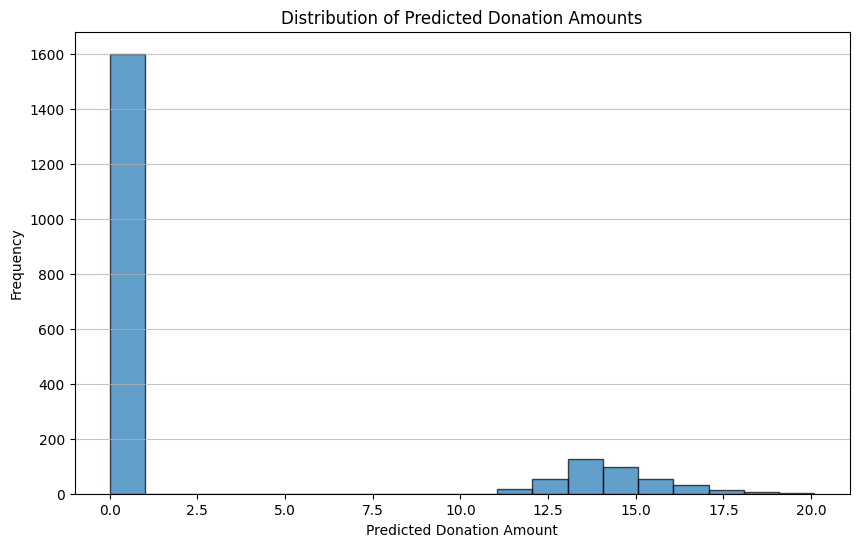

In [26]:
# Visualize the predicted donation amounts
plt.figure(figsize=(10, 6))
plt.hist(test_df_pred['Pred_Damt_log_reg'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Predicted Donation Amounts')
plt.xlabel('Predicted Donation Amount')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

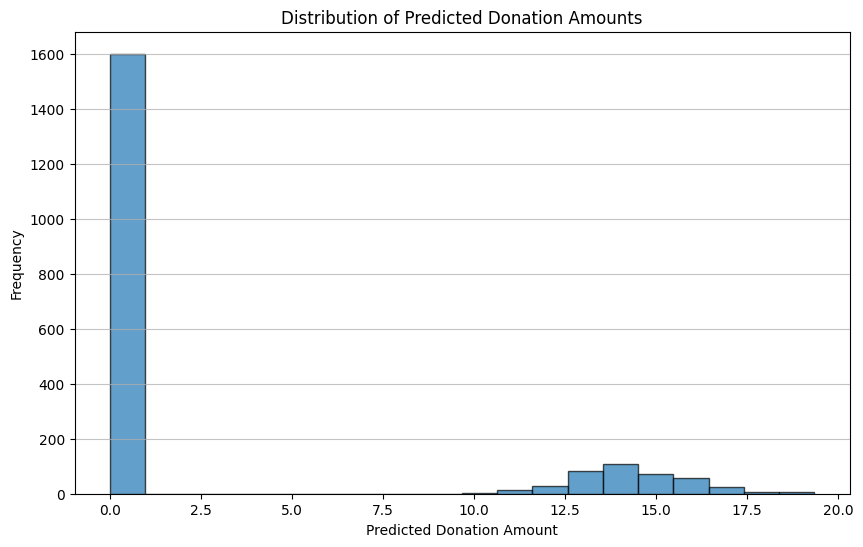

In [27]:
# Visualize the predicted donation amounts
plt.figure(figsize=(10, 6))
plt.hist(test_df_pred['Pred_Damt_gbr'], bins=20, edgecolor='k', alpha=0.7) # replaced Pred_Damt_svm with Pred_Damt_gbr by Sonali Sabnam
plt.title('Distribution of Predicted Donation Amounts')
plt.xlabel('Predicted Donation Amount')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [28]:
######## Code by: Sonali Sabnam
#Save the predictions to the test data file
from google.colab import drive
drive.mount('/content/drive')
test_df_pred=test_df_pred.drop(columns=['donr'])
# test_df['Pred_Donr_log_reg'] = y_test_pred_log_reg
test_df_pred.to_csv('/content/drive/MyDrive/test_predictions_from_merged_code.csv', index=False)

print("prediction file saved successfully")

<Figure size 800x600 with 0 Axes>

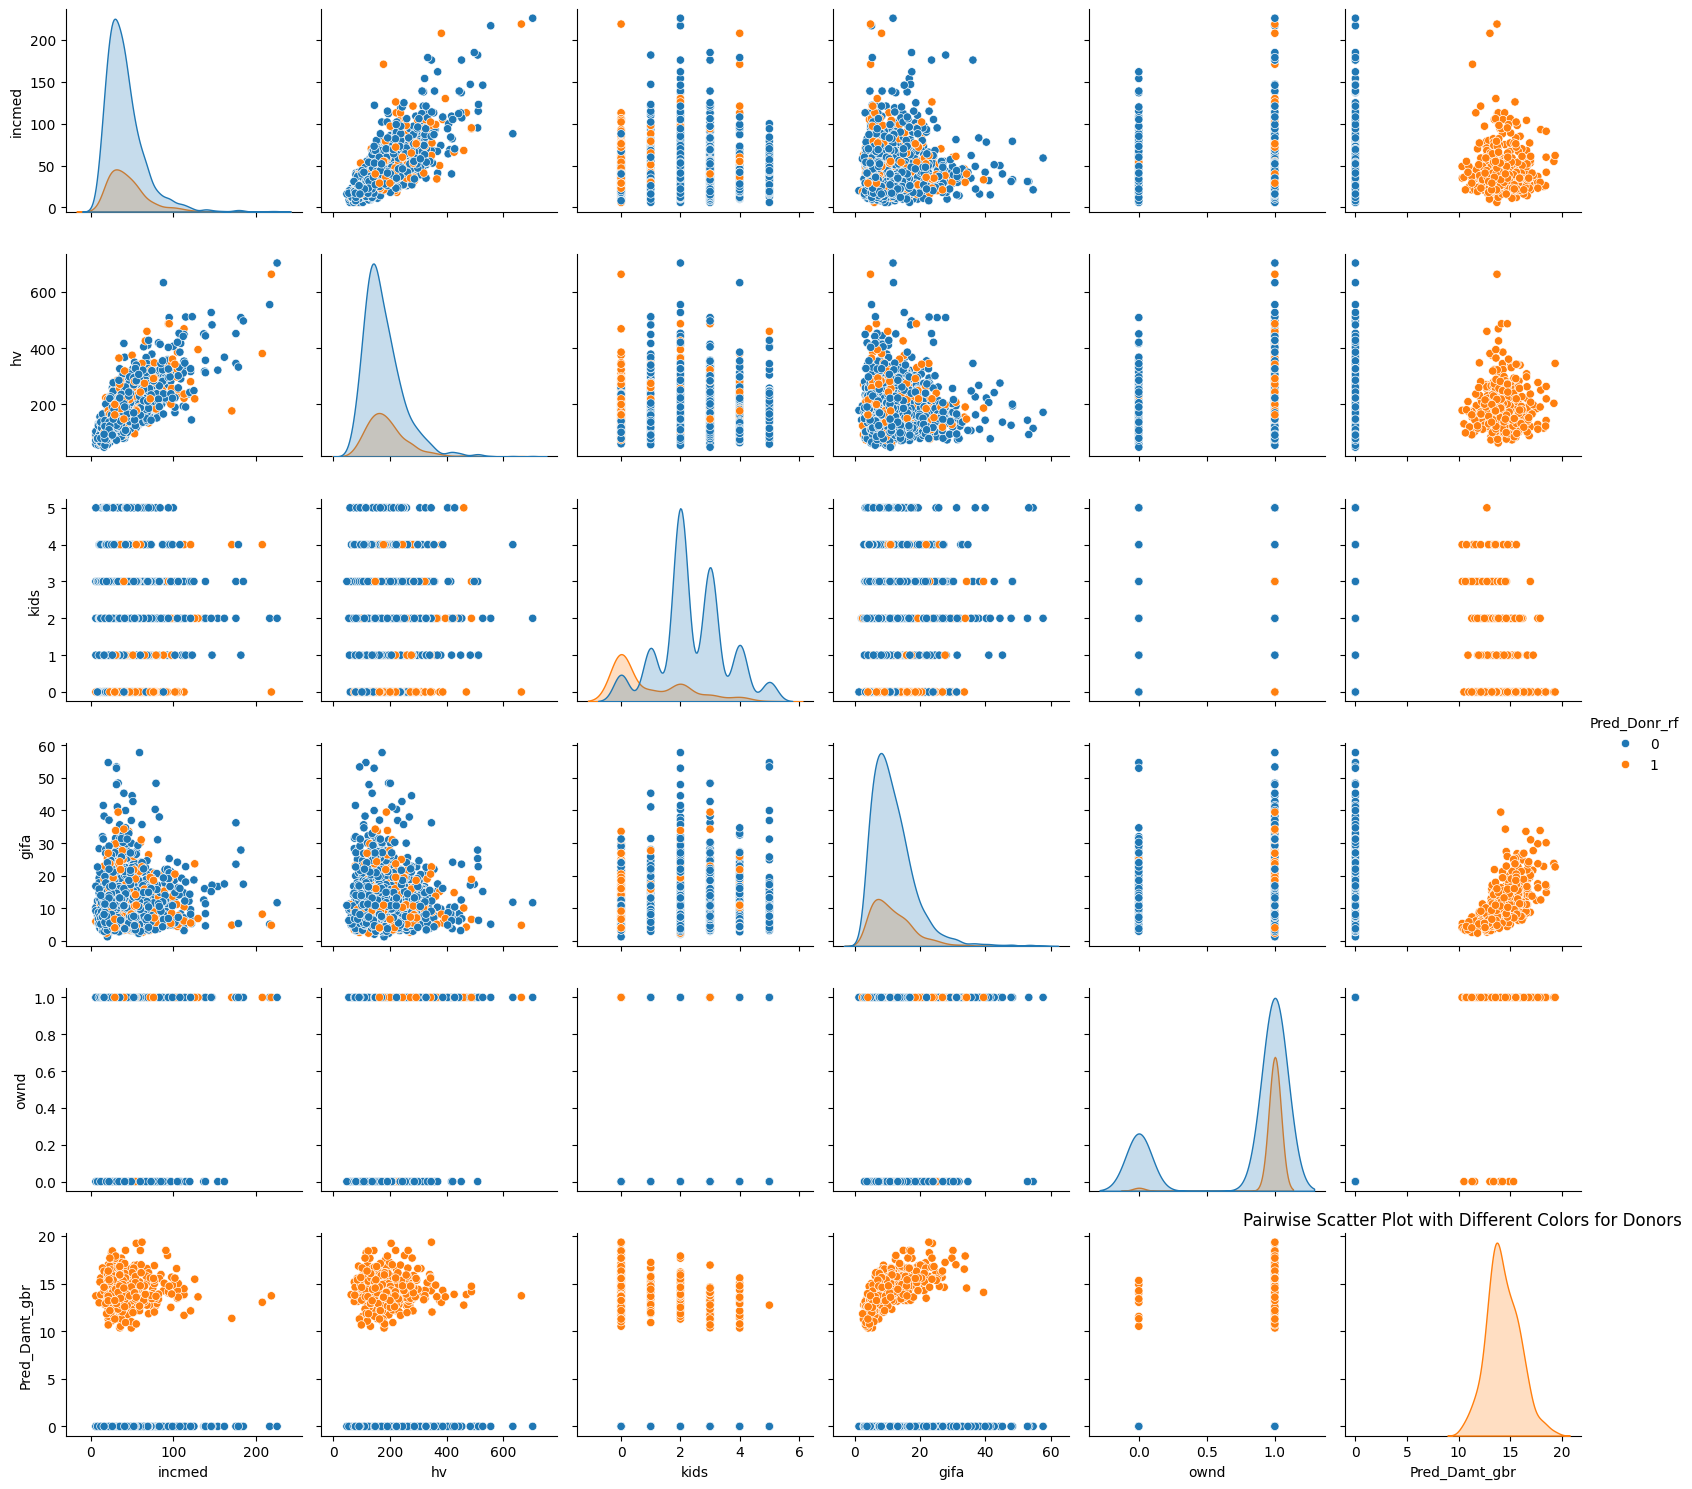

In [29]:
######## Code by: Sonali Sabnam
# Select relevant variables
variables = [ 'incmed', 'hv', 'kids', 'gifa', 'ownd', 'Pred_Damt_gbr' ]
data_subset = test_df_pred[variables +['Pred_Donr_rf']]

# Pairwise scatter plot with different colors for Holidays
plt.figure(figsize=(8, 6))
sns.pairplot(data_subset, hue='Pred_Donr_rf', diag_kind='kde')

plt.title('Pairwise Scatter Plot with Different Colors for Donors')

plt.tight_layout()
plt.savefig('my_pair_relevant_variables.png')
plt.show()

# print(test_df_pred.head())